**EXPLORATORY DATA ANALYSYS**

OBJECTIVES
1. Get to know with the data and gather interesting insights
2. Find some interesting dependencies

Firstly, let's import nessesary libraries and load some dataframes

In [466]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

At this point, I have an idea. I want to test if different regions of the world use different swear words when playing the game. To see that we need to load three dataframes below. The key that binds these dataframes together is "match_id".

In [467]:
chat = pd.read_csv('chat.csv')
players = pd.read_csv('players.csv')
match = pd.read_csv('match.csv')

Let's see how the data looks like

In [468]:
print(chat.shape)
chat.head()

(1439488, 5)


,match_id,key,slot,time,unit
0,0,force it,6,-8,6k Slayer
1,0,space created,1,5,Monkey
2,0,hah,1,6,Monkey
3,0,ez 500,6,9,6k Slayer
4,0,mvp ulti,4,934,Kira


In [469]:
print(match.shape)
match.head()

(50000, 13)


,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156


In [470]:
print(players.shape)
players.head()


(500000, 73)


,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,...,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,...,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN


The merge was performed to have combine chat data with the regions data

In [471]:
merged = chat.merge(match, on= 'match_id', how = 'inner')
merged.shape

(1439488, 17)

Quick sanity check

In [472]:
merged['cluster'].isna().sum()

np.int64(0)

Now, let's select only the columns that will prove usefull in the future

In [473]:
df = merged[['match_id', 'key', 'cluster']]
df.head()

,match_id,key,cluster
0,0,force it,155
1,0,space created,155
2,0,hah,155
3,0,ez 500,155
4,0,mvp ulti,155


Now let's edit the chat inputs so that they are all string type and only lower case. This way in the later search there will be no need to bother with capital spelling.

Then let's check how many times somebody typed "shit"

In [474]:
df.loc[:, 'key'] = df.loc[:, 'key'].astype(str)
df.loc[:, 'key'] = df.loc[:, 'key'].str.lower()
df_f = df[df.loc[:, 'key'].str.contains('shit')]
df_f[['match_id', 'cluster']]

,match_id,cluster
507,18,133
707,27,192
721,27,192
777,29,155
778,29,155
...,...,...
1439170,49989,121
1439208,49989,121
1439211,49989,121
1439234,49990,111


Just a little over 12 thousand times. Not that bad taking into consideration that the overall number of messages is 1439488

Since the regions in the cluster columns are coded, let's map them to therir real values. Bear in mind that I made some amendments to the original dataset and aggregated some regions

In [475]:
regions_map = {111: 'USA',
112: 'USA',
113: 'USA',
121:'USA',
122:'USA',
123:'USA',
124:'USA',
131:'EUROPE',
132:'EUROPE',
133:'EUROPE',
134:'EUROPE',
135:'EUROPE',
136:'EUROPE',
137:'EUROPE',
138:'EUROPE',
144:'JAPAN',
145:'JAPAN',
151:'SINGAPORE',
152:'SINGAPORE',
153:'SINGAPORE',
154:'SINGAPORE',
155:'SINGAPORE',
156:'SINGAPORE',
161:'DUBAI',
171:'AUSTRALIA',
172:'AUSTRALIA',
181:'EUROPE',
182:'EUROPE',
183:'EUROPE',
184:'EUROPE',
185:'EUROPE',
186:'EUROPE',
187:'EUROPE',
188:'EUROPE',
191:'EUROPE',
192:'EUROPE',
193:'EUROPE',
201:'SOUTH AMERICA',
202:'SOUTH AMERICA',
204:'SOUTH AMERICA',
211:'SOUTHAFRICA',
212:'SOUTHAFRICA',
213:'SOUTHAFRICA',
223:'CHINA',
224:'CHINA',
225:'CHINA',
227:'CHINA',
231:'CHINA',
232:'CHINA',
241:'SOUTH AMERICA',
242:'SOUTH AMERICA',
251:'SOUTH AMERICA',
261:'INDIA'}


Now let's count every single swear word in every region

In [476]:
mapped = df_f['cluster'].map(regions_map)
df_mapped = pd.DataFrame(mapped)
df_mapped.reset_index(inplace=True)
df_mapped['index'] = 1
df_mapped = pd.DataFrame(df_mapped.value_counts('cluster'))
df_mapped.reset_index(inplace=True)
df_mapped_2 = df_mapped.rename(columns= {'index': 'counts'})
df_mapped_2

,cluster,count
0,USA,4562
1,EUROPE,4294
2,SINGAPORE,1660
3,AUSTRALIA,1401
4,SOUTH AMERICA,164
5,DUBAI,44
6,JAPAN,20


Now let's see how does that look like on the graph

[Text(0, 0.5, 'word count'), Text(0.5, 0, 'region')]

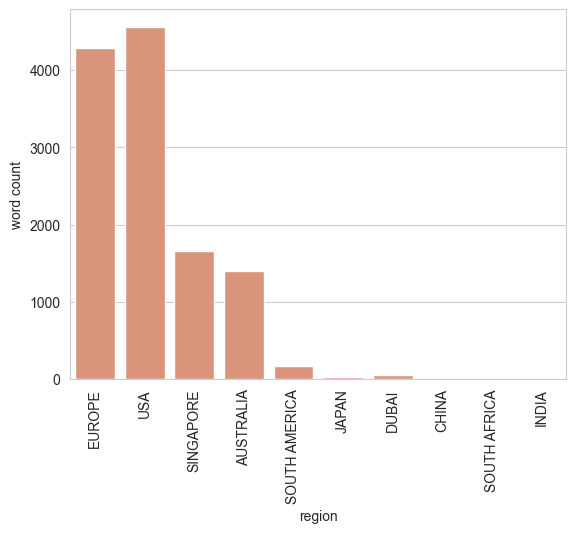

In [477]:
sns.set_palette('flare')
sns.set_style('whitegrid')
plt.xticks(rotation=90)
cat_order = ['EUROPE', 'USA', 'SINGAPORE', 'AUSTRALIA', 'SOUTH AMERICA', 'JAPAN', 'DUBAI', 'CHINA', 'SOUTH AFRICA', 'INDIA']
ax_1 = sns.barplot(data= df_mapped_2, x= 'cluster', y='count', order=cat_order)
ax_1.set(ylabel= 'word count', xlabel= 'region')

Okay that's interesting. It seems like the the majority of "shit" profanites come fro USA, closely followed by Europe. This countplot however, doesn't paint the whole picture. Maybe Europeans and Americans seem to swear so much just because on these servers there is more people who play the game? 

To verify this let's construct a theoretical "ideal" distribution that assumes that everyone swears the same amount. This way we will be able to identify if some regions swear "more than they should"

In [478]:
x = merged[['match_id', 'key', 'unit', 'duration', 'cluster']]
df_mapped = x['cluster'].map(regions_map)
pop_ratio = pd.DataFrame(df_mapped)
ratios = pop_ratio['cluster'].value_counts(normalize=True)
expected_dist = ratios * len(df_f)
df_expected_dist = pd.DataFrame(expected_dist)
df_expected_dist.reset_index(inplace=True)
df_expected_dist = df_expected_dist.rename(columns= {'cluster': 'region', 'proportion': 'counts'})

[Text(0, 0.5, 'word count'), Text(0.5, 0, 'region')]

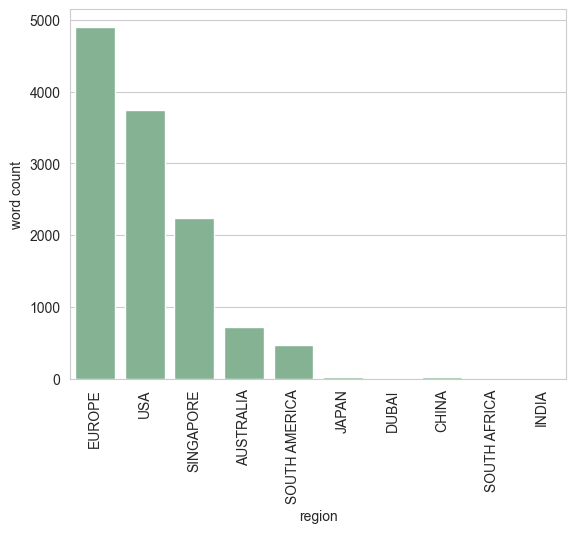

In [479]:
sns.set_palette('crest')
plt.xticks(rotation=90)
ax_2 = sns.barplot(data= df_expected_dist, x= 'region', y= 'counts', order=cat_order)
ax_2.set(ylabel= 'word count', xlabel= 'region')

As can be observed above, according to the "ideal" distribution it's the Europeans who should swear the most as they are the majoriy of the playerbase. Yet, that's not the case as the previous countplot shows us that it is the Americans who type "shit" the most. 

However, this way of presenting the results is not conveinient. Let's overlay one plot over the other to clearly visualise the problem

[Text(0, 0.5, 'word count'), Text(0.5, 0, 'region')]

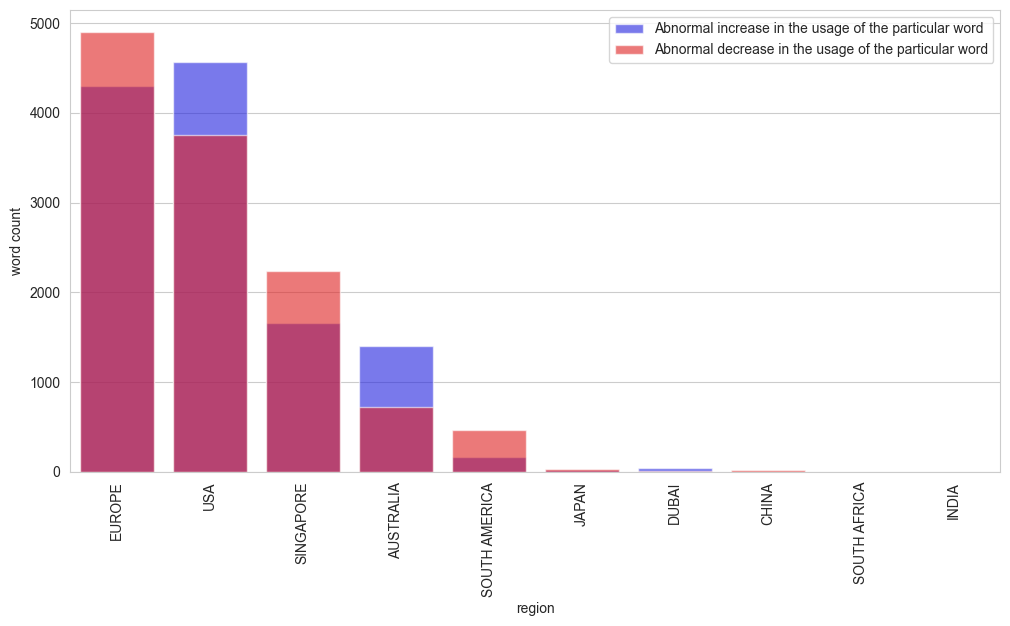

In [483]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
ax = sns.barplot(x='cluster', y='count', data=df_mapped_2, color='blue', alpha=0.6, label='Abnormal increase in the usage of the particular word', order=cat_order)
sns.barplot(x='region', y='counts', data=df_expected_dist, color='red', alpha=0.6, label='Abnormal decrease in the usage of the particular word', ax=ax, order=cat_order)
ax.set(ylabel= 'word count', xlabel= 'region')

On the plot above the abnormal decreases and increases can be clearly seen. The blue color on the Australia and USA bars suggests that these regions say "shit" more than they should be and the light orange color on the EU, Singapore and South America bars suggests that these regions say "shit" less than the population distribution would let us belive

Now let's compile all of that to one function that will present the overlayed countplot for every word we can think of. Also, since it's a sensitive topic I added a filter argumen that is by default set to true. It changes the most offensive words to their lighter versions (ie. f_word, n_word and such)

In [493]:
def show_dist_of_a_word(word, filter=True):
    """Args:
    word: the word that you want to examine
    filter = True/False, indicates if the profanities filter should be on or off"""
    chat = pd.read_csv('chat.csv')
    players = pd.read_csv('players.csv')
    match = pd.read_csv('match.csv')
    df.loc[:, 'key'] = df.loc[:, 'key'].astype(str)
    df.loc[:, 'key'] = df.loc[:, 'key'].str.lower()
    if filter== True:
        df.loc[:, 'key'] = df.loc[:, 'key'].str.replace('nigger', 'n_word')
        df.loc[:, 'key'] = df.loc[:, 'key'].str.replace('fuck', 'f_word')
        df.loc[:, 'key'] = df.loc[:, 'key'].str.replace('cunt', 'c_word')
        df.loc[:, 'key'] = df.loc[:, 'key'].str.replace('retard', 'r_word')
    df_f = df[df['key'].str.contains(f'{word}')]
    df_f[['match_id', 'cluster']]
    regions_map = {
    111:'USA',
    112:'USA',
    113:'USA',
    121:'USA',
    122:'USA',
    123:'USA',
    124:'USA',
    131:'EUROPE',
    132:'EUROPE',
    133:'EUROPE',
    134:'EUROPE',
    135:'EUROPE',
    136:'EUROPE',
    137:'EUROPE',
    138:'EUROPE',
    144:'JAPAN',
    145:'JAPAN',
    151:'SINGAPORE',
    152:'SINGAPORE',
    153:'SINGAPORE',
    154:'SINGAPORE',
    155:'SINGAPORE',
    156:'SINGAPORE',
    161:'DUBAI',
    171:'AUSTRALIA',
    172:'AUSTRALIA',
    181:'EUROPE',
    182:'EUROPE',
    183:'EUROPE',
    184:'EUROPE',
    185:'EUROPE',
    186:'EUROPE',
    187:'EUROPE',
    188:'EUROPE',
    191:'EUROPE',
    192:'EUROPE',
    193:'EUROPE',
    201:'SOUTH AMERICA',
    202:'SOUTH AMERICA',
    204:'SOUTH AMERICA',
    211:'SOUTHAFRICA',
    212:'SOUTHAFRICA',
    213:'SOUTHAFRICA',
    223:'CHINA',
    224:'CHINA',
    225:'CHINA',
    227:'CHINA',
    231:'CHINA',
    232:'CHINA',
    241:'SOUTH AMERICA',
    242:'SOUTH AMERICA',
    251:'SOUTH AMERICA',
    261:'INDIA'}
    mapped = df_f['cluster'].map(regions_map)
    df_mapped = pd.DataFrame(mapped)
    df_mapped.reset_index(inplace=True)
    df_mapped['index'] = 1
    df_mapped = pd.DataFrame(df_mapped.value_counts('cluster'))
    df_mapped.reset_index(inplace=True)
    df_mapped_2 = df_mapped.rename(columns= {'index': 'counts'})
    x = merged[['match_id', 'key', 'unit', 'duration', 'cluster']]
    df_mapped = x['cluster'].map(regions_map)
    pop_ratio = pd.DataFrame(df_mapped)
    ratios = pop_ratio['cluster'].value_counts(normalize=True)
    expected_dist = ratios * len(df_f)
    df_expected_dist = pd.DataFrame(expected_dist)
    df_expected_dist.reset_index(inplace=True)
    df_expected_dist = df_expected_dist.rename(columns= {'cluster': 'region', 'proportion': 'counts'})
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=90)
    ax = sns.barplot(x='cluster', y='count', data=df_mapped_2, color='blue', alpha=0.6, label='Abnormal increase in the usage of the particular word', order=cat_order)
    sns.barplot(x='region', y='counts', data=df_expected_dist, color='red', alpha=0.6, label='Abnormal decrease in the usage of the particular word', ax=ax, order=cat_order)
    plt.show()
    df.loc[:, 'key'] = df.loc[:, 'key'].str.replace('n_word', 'nigger')
    df.loc[:, 'key'] = df.loc[:, 'key'].str.replace('f_word', 'fuck')
    df.loc[:, 'key'] = df.loc[:, 'key'].str.replace('c_word', 'cunt')

Since the fucntion in ready, let's play around with it. 

The Australians are famous for their fondness of the particular c_word, let's see if that is reflected on the chat logs

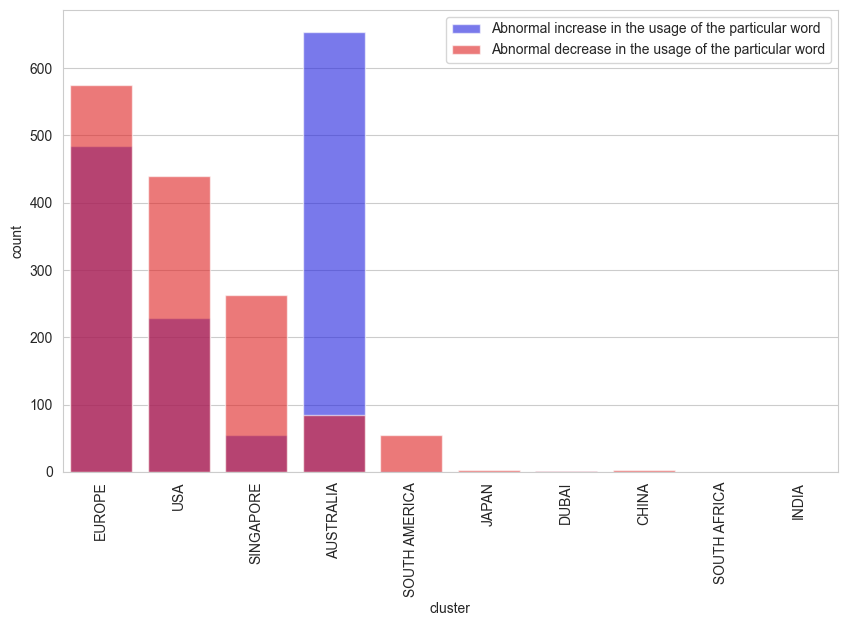

In [490]:
show_dist_of_a_word('c_word')

They are indeed, sometimes the stereotypes are true

Now let's see who's the most racist

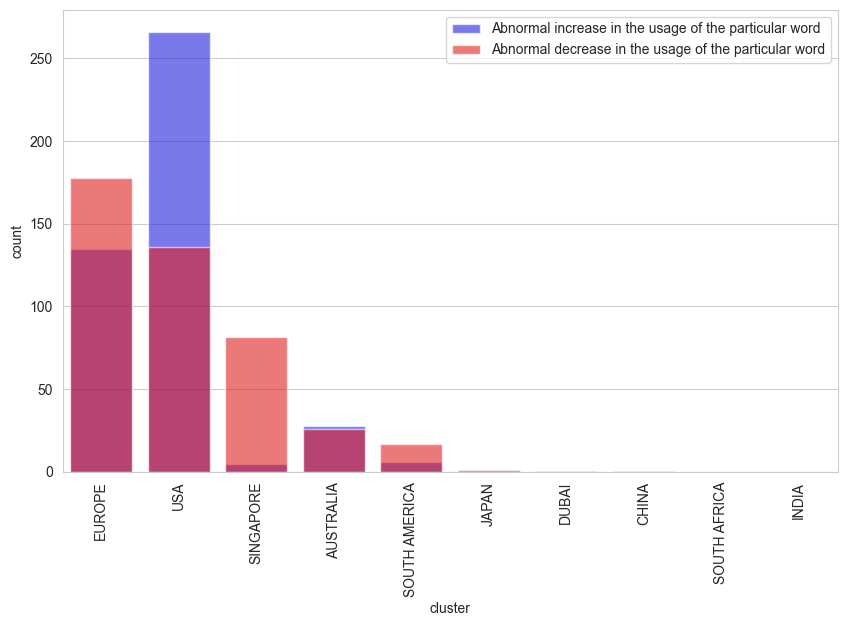

In [494]:
show_dist_of_a_word('n_word')

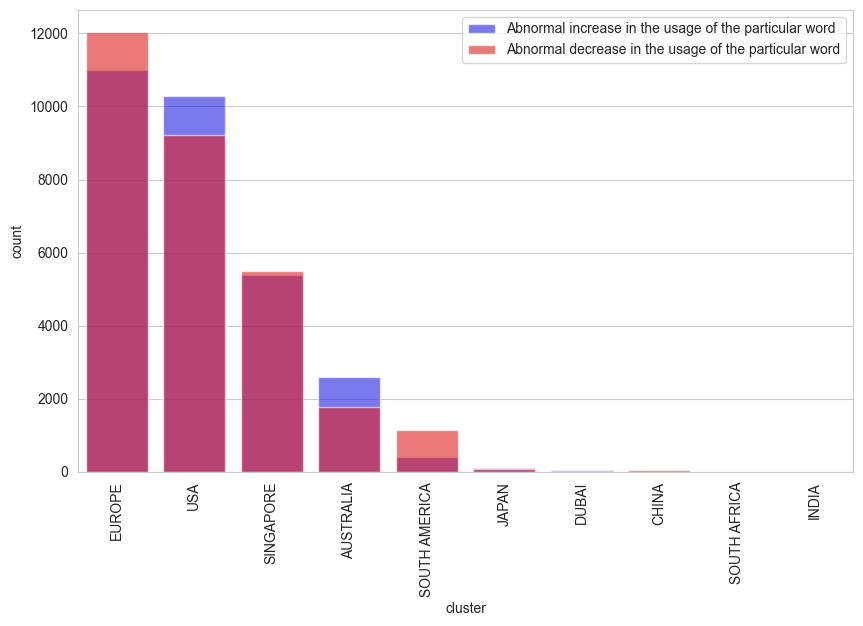

In [492]:
show_dist_of_a_word('f_word')

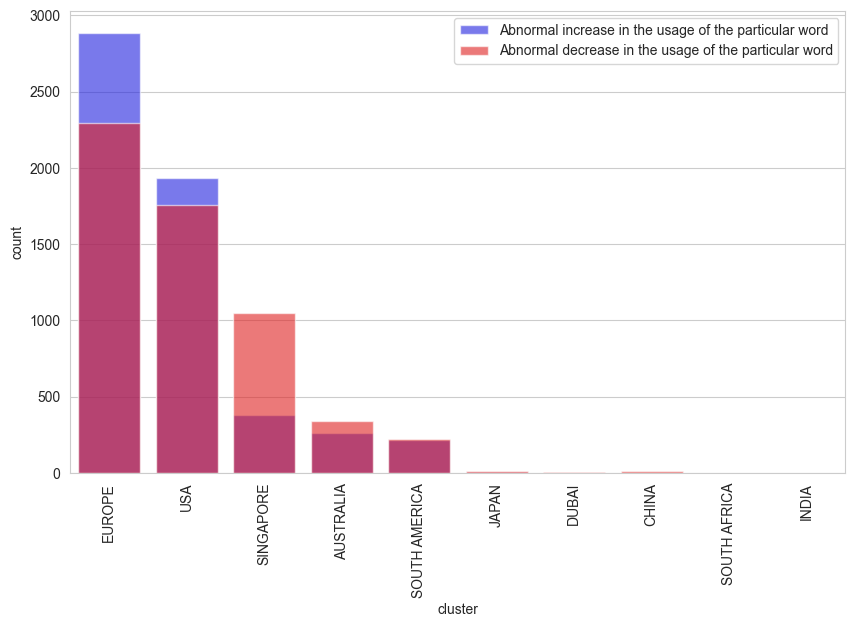

In [495]:
show_dist_of_a_word('r_word')

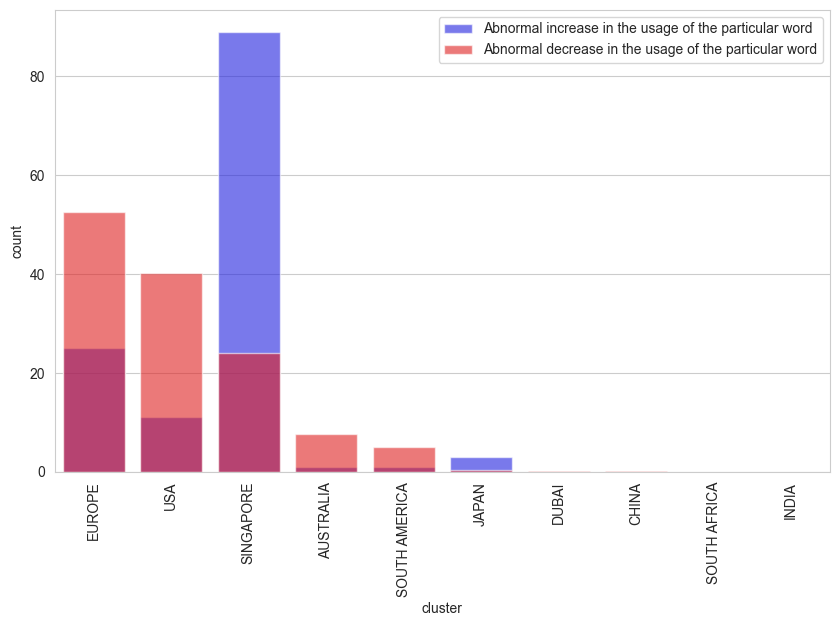

In [509]:
show_dist_of_a_word('baka')